# Handin 3
   ### Andreas Malthe Henriksen ( 202004107 )

You've built a drone, but it has a problem overheating. Temperature measurements were taken.

<table>
    <tr>
        <td>Time (minutes)</td>
        <td>2</td>
        <td>5</td>
        <td>8</td>
        <td>10</td>
        <td>11</td>
    </tr>
    <tr>
        <td>Temperature (celcius)</td>
        <td>35</td>
        <td>40</td>
        <td>50</td>
        <td>65</td>
        <td>70</td>
    </tr>
</table>

#### (a) Plot the observed data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = np.array([2,5,8,10,11])
temp = np.array([35,40,50,65,70])

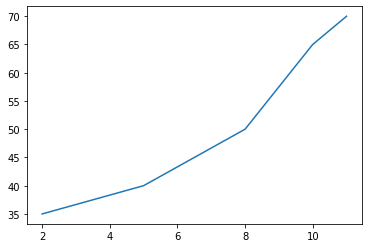

In [3]:
fig, ax = plt.subplots()

ax.plot(time,temp)

We want a good estimate as to when the temperature exceeds 55 degrees. Consider the polynomial $p(x)=a+bx+cx²$. 
#### (b) Set up a linear system of equations, such that p intersects the points given in the table above.

$$a+8b+64c=50$$
$$a+10b+100c=65$$
$$a+11b+121c=70$$

Will be set up using the np.arrays, like so

In [4]:
m = np.array([
    [1., 8.,  64.,  50.],
    [1., 10., 100,  65.],
    [1., 11., 121., 70.]
])

print(m, "\n\n r1 <= r1 - r0")
m[1,:] -= m[0,:]
print(m, "\n\n r2 <= r2 - r0")
m[2,:] -= m[0,:]
print(m, "\n\n r1 <= r1 * 0.5")
m[1,:] = m[1,:] * 0.5 
print(m, "\n\n r2 <= r2 - 3 * r1")
m[2,:] -= 3* m[1,:] 
print(m, "\n\n r2 <= (1/3) * r2")
m[2,:] = (1/3.) * m[2,:] 
print(m, "\n\n r1 <= r1 - 18 * r2")
m[1,:] -= 18 * m[2,:]
print(m, "\n\n r0 <= r0 - 64 * r2")
m[0,:] -= 64 * m[2,:]
print(m, "\n\n r0 <= r0 - 8 * r1")
m[0,:] -= 8 * m[1,:] 
print(m, "\n\n")

[[  1.   8.  64.  50.]
 [  1.  10. 100.  65.]
 [  1.  11. 121.  70.]] 

 r1 <= r1 - r0
[[  1.   8.  64.  50.]
 [  0.   2.  36.  15.]
 [  1.  11. 121.  70.]] 

 r2 <= r2 - r0
[[ 1.  8. 64. 50.]
 [ 0.  2. 36. 15.]
 [ 0.  3. 57. 20.]] 

 r1 <= r1 * 0.5
[[ 1.   8.  64.  50. ]
 [ 0.   1.  18.   7.5]
 [ 0.   3.  57.  20. ]] 

 r2 <= r2 - 3 * r1
[[ 1.   8.  64.  50. ]
 [ 0.   1.  18.   7.5]
 [ 0.   0.   3.  -2.5]] 

 r2 <= (1/3) * r2
[[ 1.          8.         64.         50.        ]
 [ 0.          1.         18.          7.5       ]
 [ 0.          0.          1.         -0.83333333]] 

 r1 <= r1 - 18 * r2
[[ 1.          8.         64.         50.        ]
 [ 0.          1.          0.         22.5       ]
 [ 0.          0.          1.         -0.83333333]] 

 r0 <= r0 - 64 * r2
[[  1.           8.           0.         103.33333333]
 [  0.           1.           0.          22.5       ]
 [  0.           0.           1.          -0.83333333]] 

 r0 <= r0 - 8 * r1
[[  1.           0.           

And we can read out the results
$$a=-76.667$$
$$b=22.5$$
$$c=-0.833$$

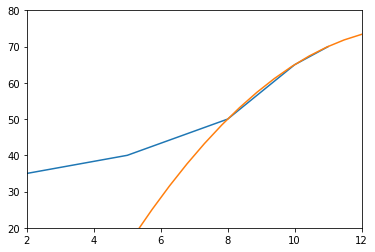

In [5]:
fig, ax = plt.subplots()
plt.xlim(2.,12.)
plt.ylim(20.,80.)

lin = np.linspace(0.,12.,24)
def p(x):
    return -76.667 + 22.5 * x -0.833 * x**2

ax.plot(time,temp)
ax.plot(lin, p(lin))

#### (c) Suppose we wanted a polynomium $p(x)$ that intersects all points, what is the minimal degree possible for $p(x)$? Plot the result.

To solve this, I will use, as adviced, the linalg.solve function.

In [6]:
# a + bx + cx² + dx³ + ex⁴
p1 = np.array([1.,2., 4.,8.,    16.])
p2 = np.array([1.,5., 25., 125.,  625.])
p3 = np.array([1.,8., 64., 512.,  4096.])
p4 = np.array([1.,10.,100.,1000., 10000.])
p5 = np.array([1.,11.,121.,1331., 14641.])

ps = np.array([p1,p2,p3,p4,p5])
r = np.array([35.,40.,50.,65.,70.]) # y-vals

solve = np.linalg.solve(ps,r)

print(solve)

[-1.97530864 32.85493827 -9.09722222  1.03395062 -0.03858025]


The resulting polynomial will be 
$$p(x)=-1.97530864 + 32.85493827x - 9.09722222x^2 +  1.03395062x^3 - 0.03858025x^4$$

Then the result is plotted.

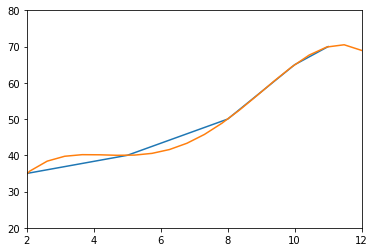

In [7]:
fig, ax = plt.subplots()
plt.xlim(2.,12.)
plt.ylim(20.,80.)

lin = np.linspace(0.,12.,24)
def p(x):
    return (-1.97530864 + 
            32.85493827 * x -
            9.09722222  * x**2 +
            1.03395062  * x**3 -
            0.03858025  * x**4 )

ax.plot(time,temp)
ax.plot(lin, p(lin))

To argue that the 4-degree polynomial above is the lowest degree solution I will compute a 3-degree solution and consider that it does not intersect all points. 

Since there are no free variables, no other solution may be found, and as such, no polynomial of degree 3 or lower may be found, that intersects all points.

Below I will use the same code, but leaving out the last observation.

In [8]:
# a + bx + cx² + dx³
p1 = np.array([1.,2., 4.,8.])
p2 = np.array([1.,5., 25., 125.,])
p3 = np.array([1.,8., 64., 512.,])
p4 = np.array([1.,10.,100.,1000.])

ps = np.array([p1,p2,p3,p4])
r = np.array([35.,40.,50.,65.]) # y-vals

solve = np.linalg.solve(ps,r)

print(solve)

[28.88888889  4.30555556 -0.76388889  0.06944444]


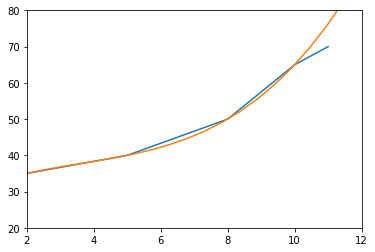

In [9]:
fig, ax = plt.subplots()
plt.xlim(2.,12.)
plt.ylim(20.,80.)

lin = np.linspace(0.,12.,24)
def p(x):
    return (28.88888889 + 
            4.30555556 * x -
            0.76388889 * x**2 +
            0.06944444 * x**3 )

ax.plot(time,temp)
ax.plot(lin, p(lin))

As we can see the last point is not intersected by the polynomial, and therefore we would not be able to make a 3rd degree polynomial that intersects all points.

Another approach is to make multiple polynomials to represent different intervals of the graph.

#### (d) Set up a system of linear equations for the function $f$

$$f(x) = \begin{cases} p_1(x) & \text{for } 5.0\leq x \leq 8.0 \\
                      p_2(x)  & \text{for } 8.0\leq x \leq 10.0
        \end{cases}$$
Where $p_1(x)$ intersects the points at 5 and 8, and where $p_2(x)$ intersects the points at 8 and 10. At $x=8$, the functions $p_1(x)$ and $p_2(x)$ should have the same slope, i.e $p_1'(8)=p_2'(8)$

In [10]:
# a + bx + cx²
p1 = np.array([1.,5., 25.])
p2 = np.array([1.,8., 64.])
p3 = np.array([1.,10.,100.])

ps = np.array([p1,p2,p3])
r = np.array([40.,50., 65.]) # y-vals

solve = np.linalg.solve(ps,r)

print(solve)

[56.66666667 -7.5         0.83333333]


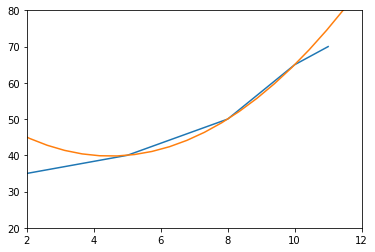

In [12]:
fig, ax = plt.subplots()
plt.xlim(2.,12.)
plt.ylim(20.,80.)

lin = np.linspace(0.,12.,24)
def p(x):
    return (56.66666667 - 
            7.5 * x +
            0.83333333 * x**2)

ax.plot(time,temp)
ax.plot(lin, p(lin))